In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import re

plt.rcParams.update({'font.size': 14, 
                    'xtick.labelsize':14,
                    'ytick.labelsize':14,
                    'axes.labelsize': 14,
                    'axes.titlesize':14})


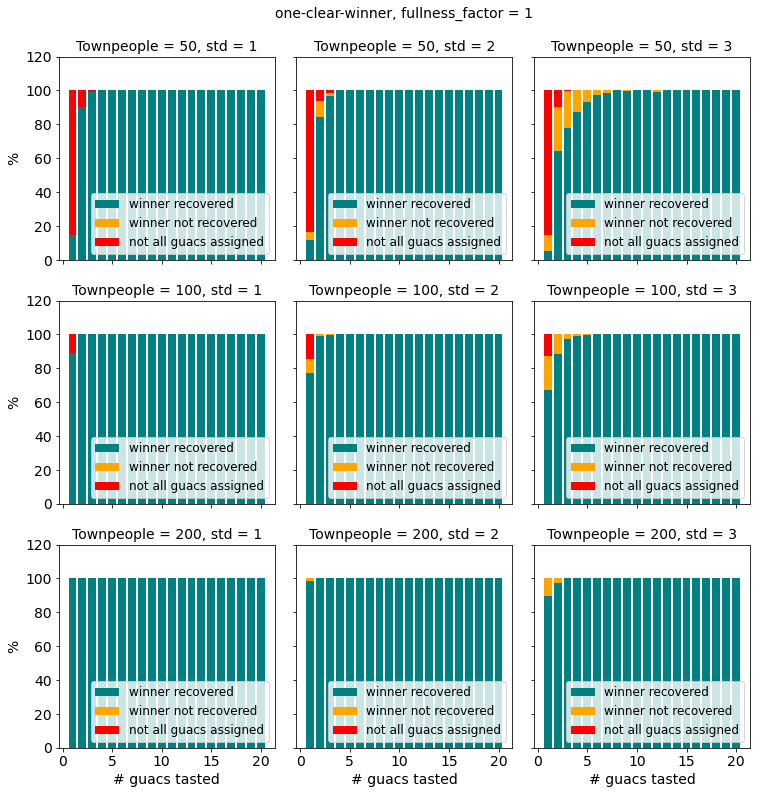

In [158]:
effect = 'fullness_factor = 1'
files = [f"../data/param_space_for_recovering_winner_total_guacs20_a-close-call_fullness_factor_20220315.csv"]
files = [f"../data/param_space_for_recovering_winner_total_guacs20_a-lot-of-contenders_fullness_factor_20220315.csv"]
files = [f"../data/param_space_for_recovering_winner_total_guacs20_one-clear-winner_fullness_factor_20220315.csv"]

# files.append(f"../data/Distribution_varying_townpeople_2_std_20total_guacs_condorcet_close_call.csv")
# files.append(f"../data/Distribution_varying_townpeople_3_std_20total_guacs_condorcet_close_call.csv")

def get_count(x,true_false):
    my_sum=0
    for i in x:
        if i == true_false:
            my_sum+=1
    return my_sum



nt_color_map = {50: 'orange', 100: 'blue', 200: 'green', 400: 'grey'}
num_guacs = 20

f = files[0]    

df = pd.read_csv(f)
number_simulations = len(df['loop_step'].unique())

guac_cols = [col for col in df_nt.columns if 'guac_' in col]
for gc in guac_cols:
    df[gc] = df[gc].apply(lambda x: str(x).lower())

nrows=3
ncols=3
fig, axes = plt.subplots(nrows, ncols, figsize=(12,12), sharex=True, sharey=True)

scenarios = ['a-close-call', 'a-lot-of-contenders', 'one-clear-winner']
for scenario in scenarios:
    if scenario in f: break
scenario = scenario + ', ' + effect
        
counter_std = 0
for std in df['standard_dev'].unique():
    
    df_std = df[df['standard_dev']==std].copy()
    counter_nt = 0

    for nt in df['number_town_people'].unique():
        
        df_nt = df_std[df_std['number_town_people'] == nt].copy()
        df_nt.set_index(['loop_step'], inplace = True)
        
        df_nt = df_nt[guac_cols].copy()
        df_ntt = df_nt.T
        df_ntt['num_true'] = df_ntt.apply(lambda x: 100.*get_count(x,'true')/number_simulations,1)
        df_ntt['num_false'] = df_ntt.apply(lambda x: 100.*get_count(x,'false')/number_simulations,1)
        df_ntt['num_not_all_assigned'] = df_ntt.apply(lambda x: 100.*get_count(x,'not_all_assigned')/number_simulations,1)

        df_ntt['guac_id'] = df_ntt.index
        df_ntt['guac_id'] = df_ntt['guac_id'].apply(lambda x: int(x.split('_')[-1]))

        axes[counter_nt,counter_std].bar(df_ntt['guac_id'].tolist(), 
                                         df_ntt['num_true'].tolist(), 
                                         color = 'teal', 
                                         label = 'winner recovered'
                                        )
        axes[counter_nt,counter_std].bar(df_ntt['guac_id'].tolist(), 
                                         df_ntt['num_false'].tolist(), 
                                         bottom = df_ntt['num_true'].tolist(), 
                                         color = 'orange', 
                                         label = 'winner not recovered'
                                        )
        axes[counter_nt,counter_std].bar(df_ntt['guac_id'], 
                                         df_ntt['num_not_all_assigned'], 
                                         bottom = df_ntt['num_true'] + df_ntt['num_false'], 
                                         color = 'red', 
                                         label = 'not all guacs assigned'
                                        )
        axes[counter_nt,counter_std].set_ylim(0, 120)
        if counter_nt == 0 and counter_std == 1:
            axes[counter_nt,counter_std].set_title(f"{scenario}\n\nTownpeople = {nt}, std = {std}")
        else:
            axes[counter_nt,counter_std].set_title(f"Townpeople = {nt}, std = {std}")

        axes[counter_nt,counter_std].legend(loc=4, fontsize=12)
        if counter_std == 0:
            axes[counter_nt,counter_std].set_ylabel('%')
        if counter_nt == ncols-1:
            axes[counter_nt,counter_std].set_xlabel('# guacs tasted')

        counter_nt+=1
    counter_std+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.2)  
plt.savefig(f"../plots/{re.sub('.csv', '', f.split('/')[-1])}_viz.png")
